## Regression 使用Pytorch做回归

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 准备数据

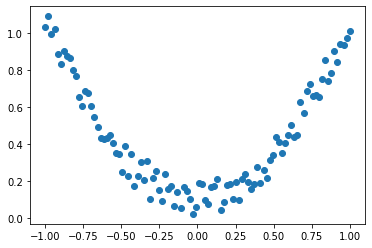

In [3]:
# torch.manual_seed(1)    # reproducible
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# 将1维数据转换成2维数据，torch不能处理1维数据。x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()  # 有噪音的抛物线图

In [4]:
class Net(torch.nn.Module):  # 输入特征，线性处理进入隐藏层的数据，线性处理进入输出层的数据
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):   # 激活一下进入隐藏层的数据
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network 的大小
print(net)  # 显示网络结构 net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


训练

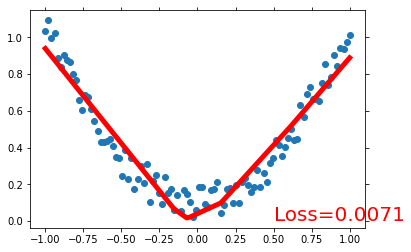

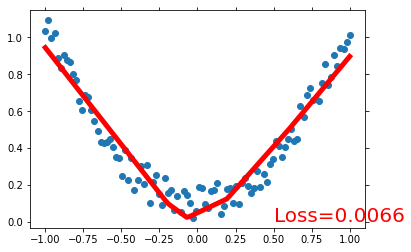

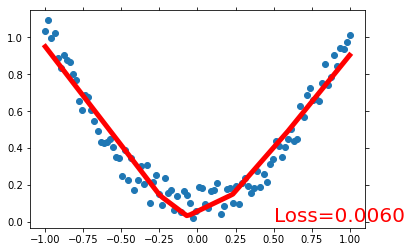

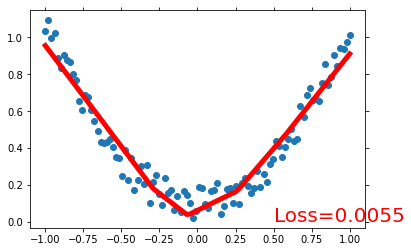

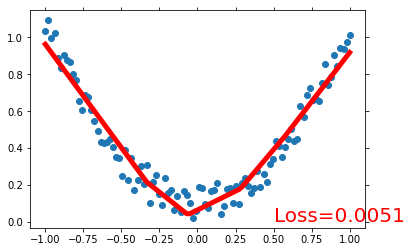

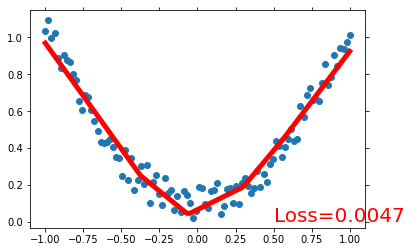

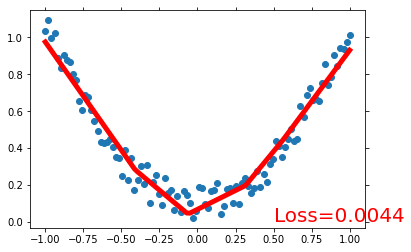

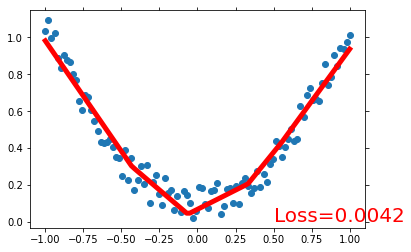

In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 设置优化器优化网络（优化参数，学习率）
loss_func = torch.nn.MSELoss()  # 均方差处理回归问题 this is for regression mean squared loss

for t in range(200):  # 训练的过程
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # 计算预测值和真实值的误差，预测值在前面，顺序不同可能影响结算结果 must be (1. nn output, 2. target)
    optimizer.zero_grad()   # 梯度重置为零 clear gradients for next train
    loss.backward()         # 开始这次的反向传递，计算梯度 backpropagation, compute gradients
    optimizer.step()        # 使用优化器优化梯度，apply gradients
    if t % 25 == 0:
        # 可视化显示训练过程 plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.show()